# Computing Thermal Flux

Computing thermal flux is pretty much the same deal as the reflected light. There are just a couple tweaks we will have to make in order to make sure we have the full set of info. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
#picaso
from picaso import justdoit as jdi 
from picaso import justplotit as jpi

#plotting
jpi.output_notebook()

Loading BokehJS ...

We will use new Hot Jupiter template to guide us through the exercise. 

In [2]:
opa = jdi.opannection(wave_range=[3,5])

case1 = jdi.inputs()

case1.phase_angle(0) 


#here we are going to have to specify gravity through R and M since we need it in the Flux calc
case1.gravity(mass=1, mass_unit=jdi.u.Unit('M_jup'), 
              radius=1.2, radius_unit=jdi.u.Unit('R_jup'))

#here we are going to have to specify R as well
case1.star(opa, 4000,0.0122,4.437,radius=0.7, radius_unit = jdi.u.Unit('R_sun') )

#atmo
case1.atmosphere(filename = jdi.HJ_pt(), delim_whitespace=True)#

#can uncomment for clouds to explore!
#case1.clouds(filename = jdi.HJ_cld(), delim_whitespace=True)


## Return ``PICASO`` Full Ouput

In [3]:
df= case1.spectrum(opa, full_output=True,calculation='thermal') #note the new last key 

wno, fpfs , fp = df['wavenumber'] , df['fpfs_thermal'], df['thermal']
wno_bin, fpfs_bin = jdi.mean_regrid(wno, fpfs, R=150)
wno_bin, fp_bin = jdi.mean_regrid(wno, fp, R=150)
full_output = df['full_output']


Here we are getting a few error messages that our example `HJ_cld` had some unrecognized molecules. Looking them over, this looks okay! `x` is not a molecule, and neither is `Kzz`. The code has accurately identified non-molecules in our input.

## Analyzing Thermal Emission Output

All the functionality that we used for reflected light we will also be able to use for thermal emission

### Mixing Ratios and Pressure Temperature plots

In [4]:
jpi.show(jpi.row(
    jpi.mixing_ratio(full_output, plot_height=500), 
    jpi.pt(full_output, plot_height=500)))
#can also input any key word argument acceptable for bokeh.figure: 
#show(jpi.mixing_ratio(full_output, plot_width=500, y_axis_type='linear',y_range=[10,1e-3])) 

## Standard Relative Flux Fp/Fs

The same function as reflected light will work with any of the thermal emission output

In [5]:
jpi.show(jpi.spectrum(wno_bin,fpfs_bin*1e6,plot_width=500,y_axis_type='log'))

## Exploring Thermal Emission Spectrum

This is a useful plot to see the interplay between the computed flux and blackbodies of temperatures at various pressures along the PT profile. 

When you specify a pressure here, it will find the corresponding temperature along the PT profile and plot that blackbody. 

In [6]:
jpi.show(jpi.flux_at_top(df, pressures=[1e-4, 1e-3,1e-2,1e-1], 
                         R=150,  plot_width=500, plot_height=400))

## Thermal Contribution Function

Contribution functions give us an understanding of where pressures flux is being emitted (e.g. [Lothringer et al 2018](https://iopscience.iop.org/article/10.3847/1538-4357/aadd9e#apjaadd9es3-3-1) Figure 12) 

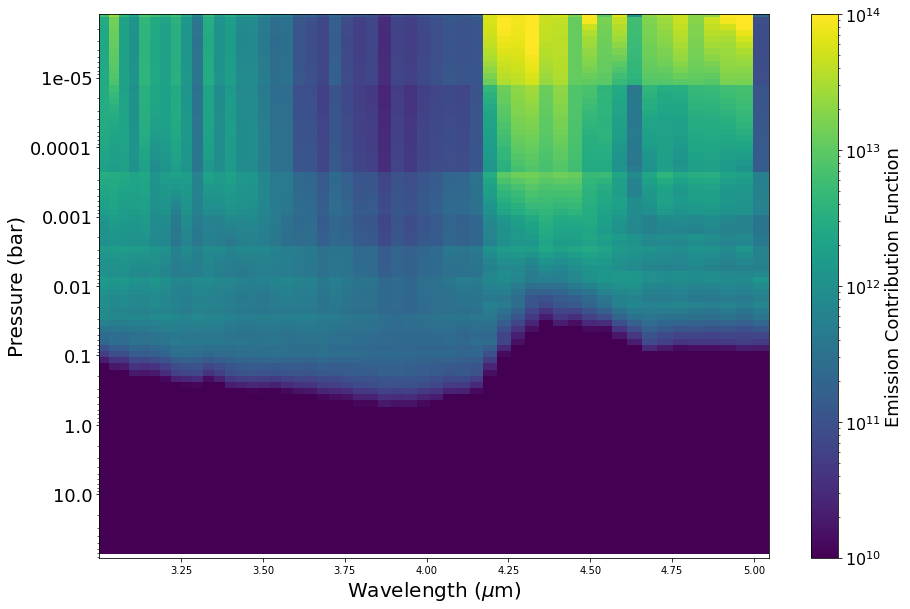

In [7]:
fig, ax, CF = jpi.thermal_contribution(df['full_output'], 
                                       norm=jpi.colors.LogNorm(vmin=1e10, vmax=1e14))

## Brightness Temperature 

This is another way to look at the plot above that compares the outgoing thermal radiation with blackbody curves. Brightness temperature is effectively plotting the associated blackbody temperature at each wavelength point and is equal to: 

$T_{\rm bright}=\dfrac{a}{{\lambda}log\left(\dfrac{{b}}{F(\lambda){\lambda}^5}+1\right)}$

where a = 1.43877735$\times$10$^{-2}$ m.K and b = 11.91042952$\times$10$^{-17}$ m$^4$kg/s$^3$ 

We also plot the minimum and maximum temperatures of the pressure-temperature profile that was input. This gives you a sense for how your brightness temperature compares to the upper and lower bounds. It can also help trouble shoot your input P-T profile. **Specifically, a brightness temperature that exceeds the maximum temperature could indicate that your pressure grid does not go to high enough pressures.**


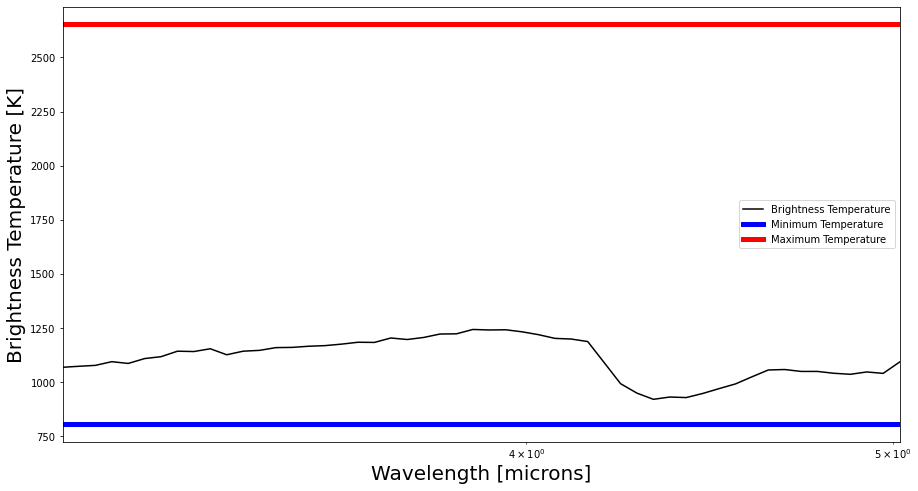

In [8]:
brightness_temp, figure= jpi.brightness_temperature(df,R=100)